#### 先插一句题外话，和@炸鸡人吐槽了一下jupyter notebook中显示的图片太模糊，解锁了新技能，添加下面这句图片质量提升显著

#### https://zhuanlan.zhihu.com/p/380416574

In [7]:
%config InlineBackend.figure_format = 'retina'

In [19]:
import xarray as xr
import salem

In [51]:
fn = r'../wrfout_hourly_d01_2022-08-09_23:00:00.nc'
dr = xr.open_dataset(fn,engine='netcdf4')
dr = salem.open_wrf_dataset(fn)

In [62]:
t2 = dr['T2'].isel(time=0)
u10= dr['U10'].isel(time=0)
v10= dr['V10'].isel(time=0)
u = dr.isel(time=0).salem.wrf_plevel('U', levels=[1000.])
v = dr.isel(time=0).salem.wrf_plevel('V', levels=[1000.])
wspd = dr.isel(time=0).salem.wrf_plevel('W', levels=[1000.])

In [54]:
u

<xarray.DataArray 'U' (p: 1, south_north: 229, west_east: 389)>
array([[[-19.41434177, -20.11908452, -20.67836127, ...,  -6.76521327,
          -6.69798496,  -6.63117087],
        [-19.31071305, -19.84303378, -20.2638535 , ...,  -6.70551087,
          -6.65267672,  -6.59413966],
        [-19.13322097, -19.56570294, -19.88315255, ...,  -6.62848172,
          -6.58923085,  -6.54562191],
        ...,
        [ -3.09140126,  -2.89989689,  -2.63272231, ...,  16.74937053,
          16.90077306,  17.03414187],
        [ -3.16353602,  -2.92208828,  -2.61174939, ...,  16.61041893,
          16.75255481,  16.87509271],
        [ -3.25304706,  -2.95598014,  -2.62304379, ...,  16.42088535,
          16.55683031,  16.66099481]]])
Coordinates:
    time         datetime64[ns] 2022-08-09T23:00:00
    lat          (south_north, west_east) float32 23.7 23.73 ... 47.26 47.22
    lon          (south_north, west_east) float32 -119.4 -119.3 ... -64.17
  * west_east    (west_east) float64 -2.328e+06 -2.316e+06 ... 2.328e+06
  * south_north  (south_north) float64 -1.368e+06 -1.356e+06 ... 1.368e+06
  * p            (p) float64 500.0
Attributes:
    pyproj_srs:  +proj=lcc +lat_0=38.9999961853027 +lon_0=-97 +lat_1=30 +lat_...

In [55]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import numpy as np 

## 风矢量

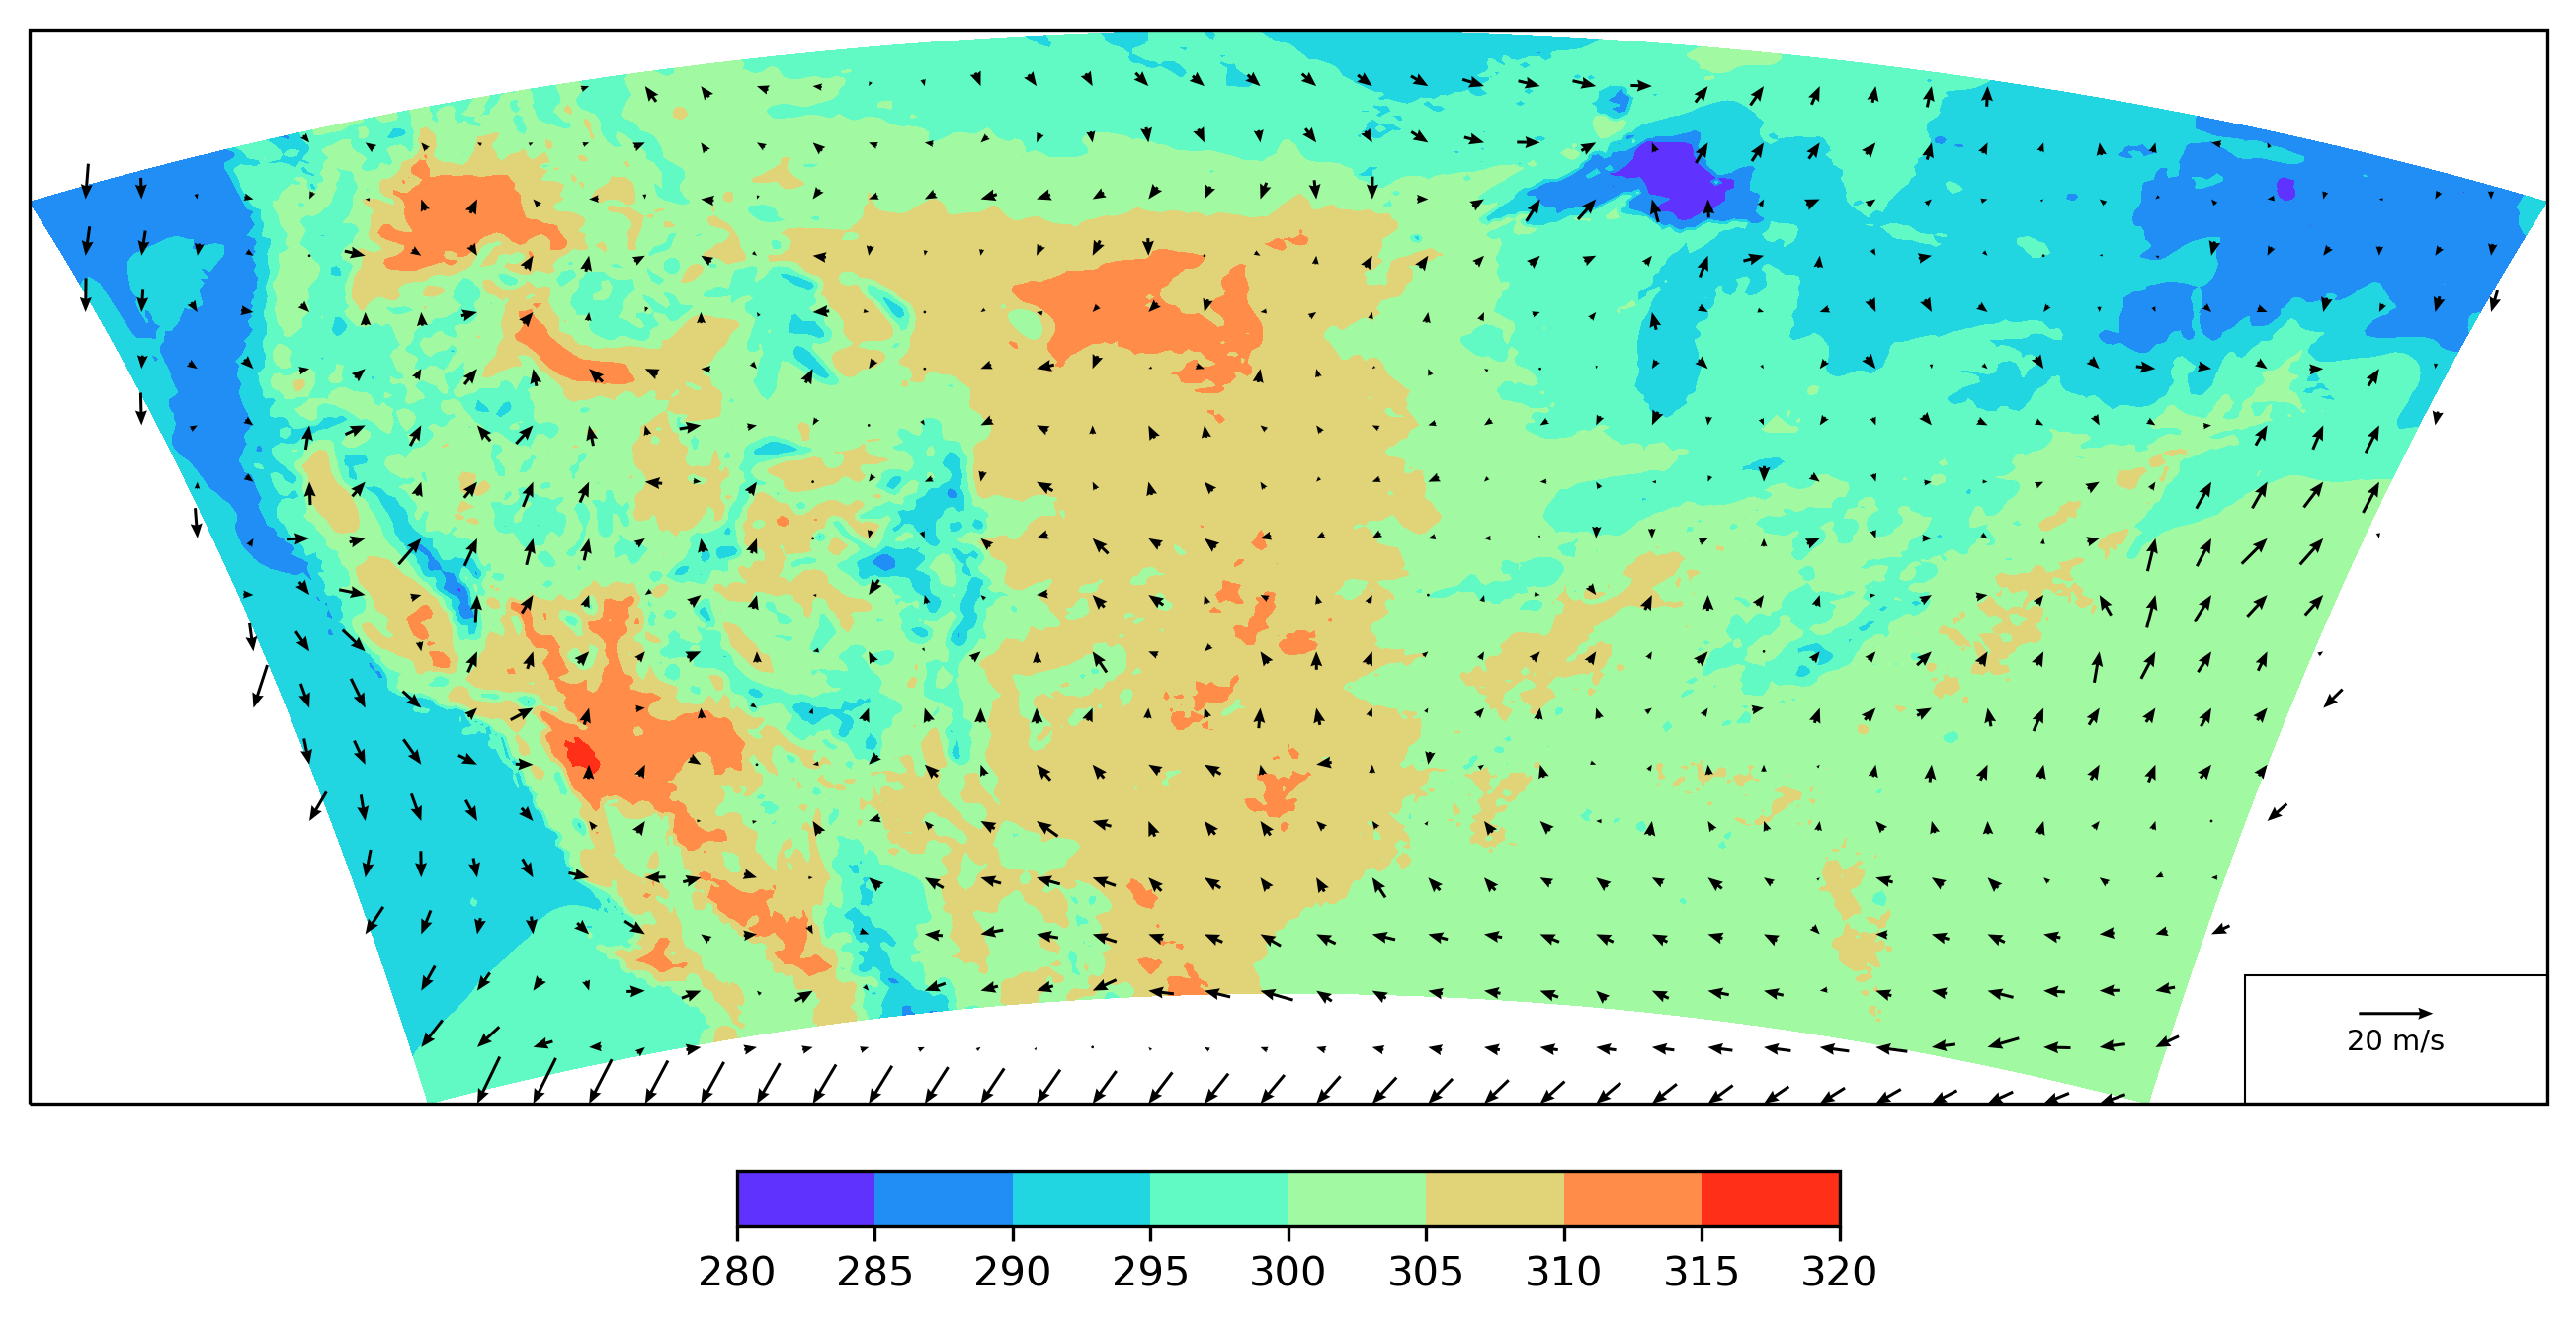

In [86]:
cart_proj = crs.PlateCarree()
fig = plt.figure(figsize=(12,6), dpi=150)
ax = plt.axes(projection=cart_proj)

levels = np.arange(280,325,5)
wspd_contours = ax.contourf(dr.lon, dr.lat, t2.data,
                             levels=levels,
                             cmap=get_cmap("rainbow"),
                             transform=crs.PlateCarree())
cb_wspd = fig.colorbar(wspd_contours, ax=ax, orientation="horizontal", pad=.05, shrink=.40)

# https://zhajiman.github.io/post/cartopy_introduction/
# 添加矢量箭头
wvc = ax.quiver(
            dr.lon.data, dr.lat.data,
            u10.data, v10.data, 
            pivot='tip',
            scale_units='inches', scale=80, angles='uv',
            units='inches', width=0.01, headwidth=4,
            regrid_shape=20, transform=cart_proj
        )

# 在ax右下角腾出放图例的空间.
import matplotlib.patches as mpatches
w, h = 0.12, 0.12
rect = mpatches.Rectangle( (1 - w, 0), w, h, transform=ax.transAxes,fc='white', ec='k', lw=0.5, zorder=1.1)
ax.add_patch(rect)
# 添加风箭头的图例.
qk = ax.quiverkey(wvc, X=1-w/2, Y=0.7*h, U=20,label=f'{20} m/s', labelpos='S', labelsep=0.05,fontproperties={'size': 'x-small'})